In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

In [2]:
ds = xr.open_dataset('../../data/sst.mnmean.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2016, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-01-07

In [3]:
# 第一问
sst2017=ds['sst'].loc['20170701',:,:]
sst2017

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 2017-07-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [4]:
lon=sst2017['lon'][:].data
lat =sst2017['lat'][:].data

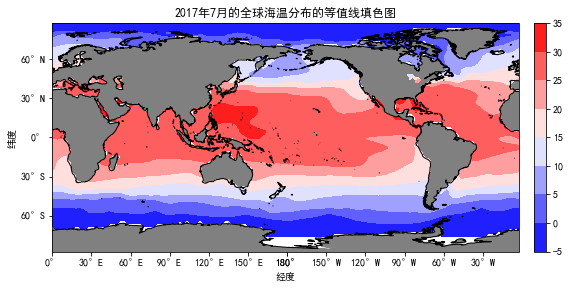

In [5]:
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
# 添加海岸线和陆地
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAND,facecolor='grey')
# 添加坐标轴
ax.set_xticks(np.arange(-180, 180 + 30, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90 + 30, 30), crs=ccrs.PlateCarree())
## 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置刻度大小
ax.tick_params(axis='y',labelsize=10)
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_title('2017年7月的全球海温分布的等值线填色图')

# 画图
colorbar=ax.contourf(lon,lat,sst2017.data,cmap='bwr',transform=ccrs.PlateCarree())
plt.colorbar(colorbar, extendrect='True', pad=0.03, fraction=0.04, shrink=0.7)

# 保存图片
plt.savefig('../../picture/pythonhome/9/qu1.png')

In [6]:
# 第二问
ds1=xr.open_dataset('../../data/ERA5_uv_202111.nc')
ds1

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2021-11-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-16 06:02:30 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [8]:
u=ds1['u10'].data
v=ds1['v10'].data
lonb=ds1['longitude'].data
latb=ds1['latitude'].data
lons,lats=np.meshgrid(lonb,latb)

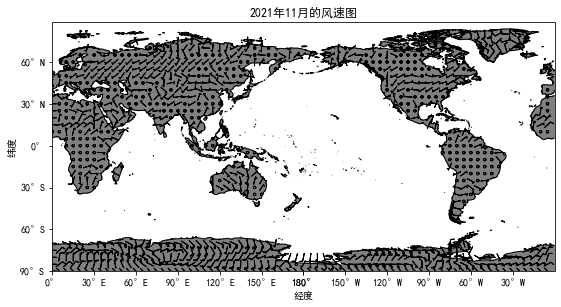

In [9]:
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
# 添加海岸线和陆地
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAND,facecolor='grey')
# 添加坐标轴
ax.set_xticks(np.arange(-180, 180 + 30, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90 + 30, 30), crs=ccrs.PlateCarree())
## 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置刻度大小
ax.tick_params(axis='y',labelsize=10)
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_title('2021年11月的风速图')

# 画图
ax.barbs(lons[::50,::50], lats[::50,::50], u[0,::50,::50], v[0,::50,::50],
              pivot='middle', length=4, barb_increments=dict(half=2, full=4, flag=20),
              color='black', transform=ccrs.PlateCarree())
# 保存图片
plt.savefig('../../picture/pythonhome/9/qu2.png',dpi=500)

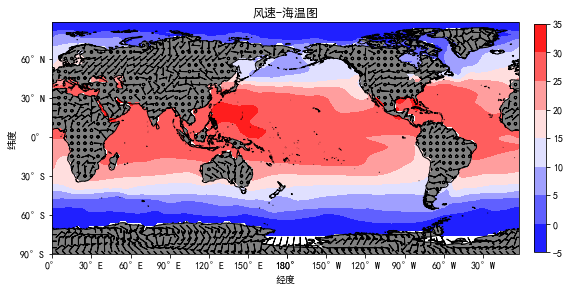

In [10]:
# 第三问
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
# 添加海岸线和陆地
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAND,facecolor='grey')
# 添加坐标轴
ax.set_xticks(np.arange(-180, 180 + 30, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90 + 30, 30), crs=ccrs.PlateCarree())
## 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置刻度大小
ax.tick_params(axis='y',labelsize=10)
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_title('风速-海温图')

# 画图
ax.barbs(lons[::50,::50], lats[::50,::50], u[0,::50,::50], v[0,::50,::50],
              pivot='middle', length=4, barb_increments=dict(half=2, full=4, flag=20),
              color='black', transform=ccrs.PlateCarree())

colorbar=ax.contourf(lon,lat,sst2017.data,cmap='bwr',transform=ccrs.PlateCarree())
plt.colorbar(colorbar, extendrect='True', pad=0.03, fraction=0.04, shrink=0.7)

# 保存图片
plt.savefig('../../picture/pythonhome/9/qu3.png',dpi=500)